# Prepare a prediction model for profit of 50_startups data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [43]:
#Read the data
startup= pd.read_csv("C:/Users/acer/Documents/Excel r/Assignments/Multiple regression/50_Startups.csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [44]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [45]:
#check for missing values
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Correlation Matrix

In [46]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatter plot between variables along with histogram

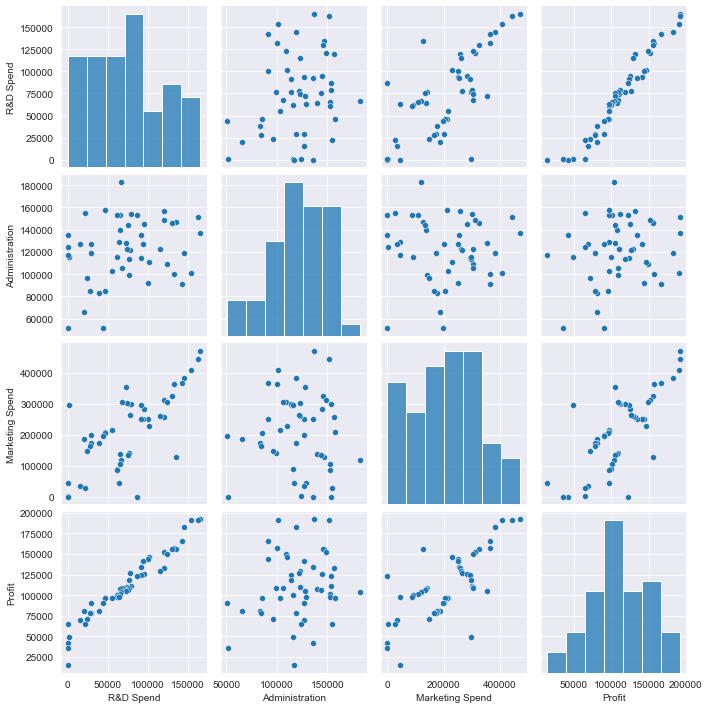

In [47]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(startup)

In [48]:
Profit=startup['Profit']

In [49]:
MarketingSpend=startup['Marketing Spend']
RDSpend=startup['R&D Spend']
Administration=startup['Administration']

# Preparing model

In [50]:
#Build model
import statsmodels.formula.api as smf 
model= smf.ols('Profit ~ RDSpend+Administration+MarketingSpend',data=startup).fit()


In [51]:
#Coefficients
model.params

Intercept         50122.192990
RDSpend               0.805715
Administration       -0.026816
MarketingSpend        0.027228
dtype: float64

In [52]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept          7.626218
RDSpend           17.846374
Administration    -0.525507
MarketingSpend     1.655077
dtype: float64 
 Intercept         1.057379e-09
RDSpend           2.634968e-22
Administration    6.017551e-01
MarketingSpend    1.047168e-01
dtype: float64


In [53]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# Simple linear regression model

In [54]:

ml_RDSpend=smf.ols('Profit~RDSpend',data = startup).fit()  
#t and p-Values
print(ml_RDSpend.tvalues, '\n', ml_RDSpend.pvalues)  

Intercept    19.320288
RDSpend      29.151139
dtype: float64 
 Intercept    2.782697e-24
RDSpend      3.500322e-32
dtype: float64


In [55]:
(ml_RDSpend.rsquared,ml_RDSpend.rsquared_adj)

(0.9465353160804392, 0.9454214684987816)

In [56]:
ml_Administration=smf.ols('Profit~Administration',data = startup).fit()  
print(ml_Administration.tvalues, '\n', ml_Administration.pvalues)  

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [57]:
(ml_Administration.rsquared,ml_Administration.rsquared_adj)

(0.04028714077757245, 0.020293122877105274)

In [58]:
ml_MarketingSpend=smf.ols('Profit~MarketingSpend',data = startup).fit()  
print(ml_MarketingSpend.tvalues, '\n', ml_MarketingSpend.pvalues)  

Intercept         7.808356
MarketingSpend    7.802657
dtype: float64 
 Intercept         4.294735e-10
MarketingSpend    4.381073e-10
dtype: float64


In [59]:
(ml_MarketingSpend.rsquared,ml_MarketingSpend.rsquared_adj)

(0.5591535746115515, 0.5499692740826254)

In [60]:
#Table of models and r square
d1 = {'Variables':['RDSpend','Administration','MarketingSpend'],'R Squared':[ml_MarketingSpend.rsquared,ml_Administration.rsquared,ml_RDSpend.rsquared]}
RSquared_frame = pd.DataFrame(d1)  
RSquared_frame

,Variables,R Squared
0,RDSpend,0.559154
1,Administration,0.040287
2,MarketingSpend,0.946535


In [61]:
rsq_profit = smf.ols('Profit~RDSpend+Administration+MarketingSpend',data=startup).fit().rsquared  
vif_profit = 1/(1-rsq_profit) 

rsq_RDSpend = smf.ols('RDSpend~Profit+Administration+MarketingSpend',data=startup).fit().rsquared  
vif_RDSpend = 1/(1-rsq_RDSpend) 

rsq_Administration= smf.ols('Administration~Profit+RDSpend+MarketingSpend',data=startup).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration) 

rsq_MarketingSpend= smf.ols('MarketingSpend~Administration+Profit+RDSpend',data=startup).fit().rsquared  
vif_MarketingSpend = 1/(1-rsq_MarketingSpend)

# Storing vif values in a data frame
d1 = {'Variables':['Profit','RDSpend','Administration','MarketingSpend'],'VIF':[vif_profit,vif_RDSpend,vif_Administration,vif_MarketingSpend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Profit,20.302917
1,RDSpend,19.563001
2,Administration,1.182146
3,MarketingSpend,2.465332


# Residual Analysis(Test for Normality of Residuals(Q-Q plot))

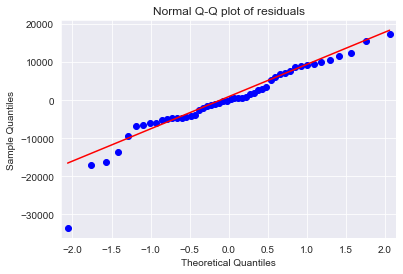

In [62]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [63]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

# Residual plot for homoscedasticity

In [64]:

def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

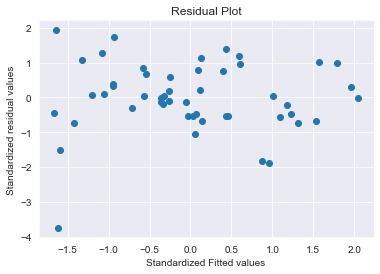

In [65]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual VS Regressors

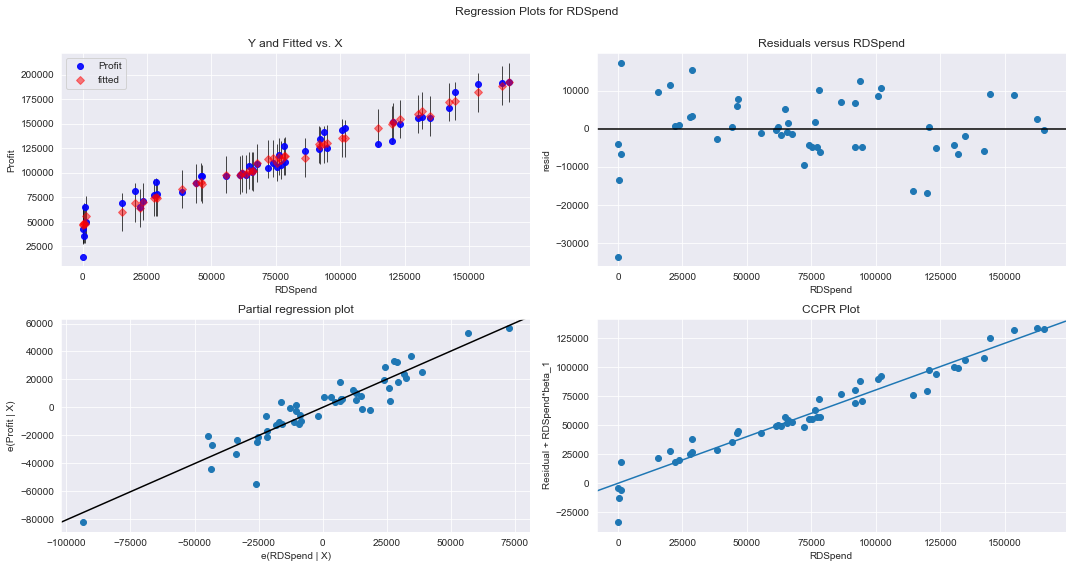

In [66]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDSpend", fig=fig)
plt.show()

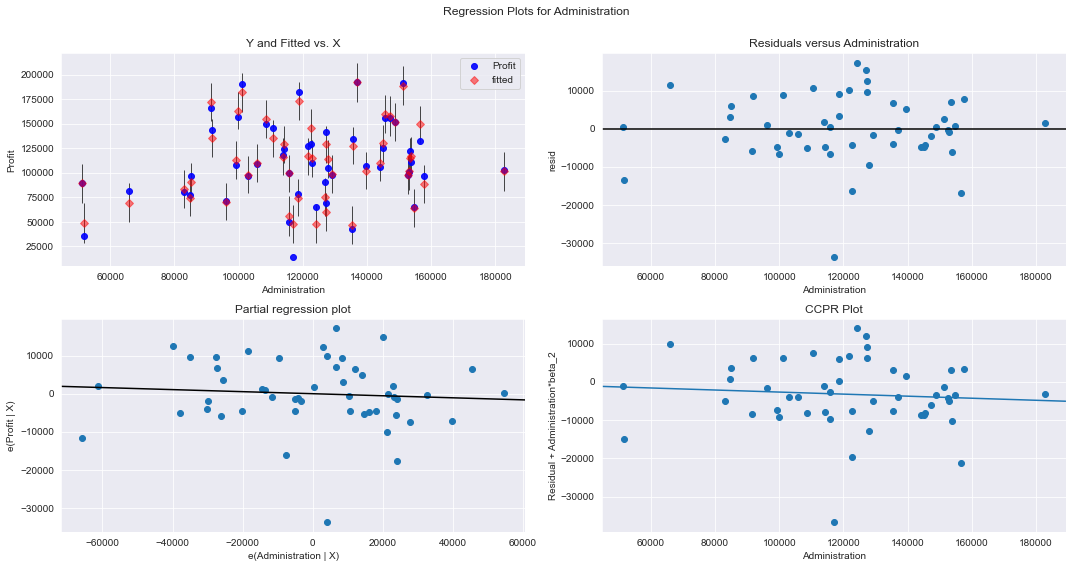

In [67]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

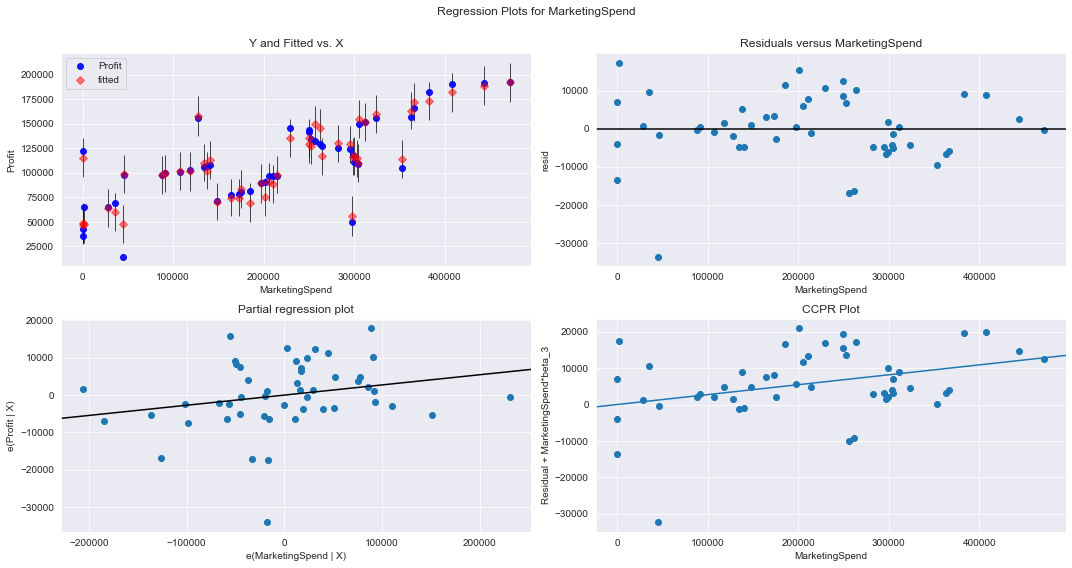

In [68]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MarketingSpend", fig=fig)
plt.show()

# Model Deletion Dignostic


# Detecting Influencers/Outliers

# Cooks Distance

In [69]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

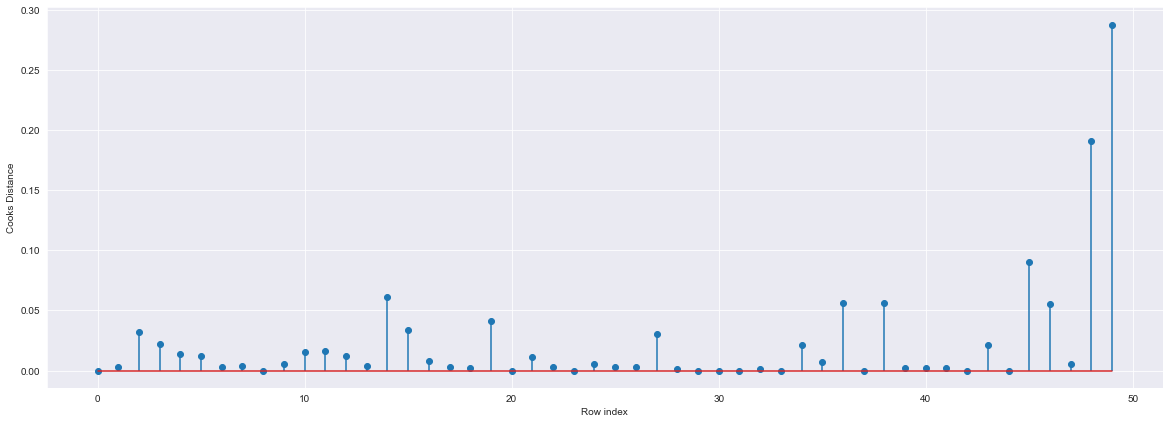

In [70]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [71]:
#index and value of influencer where c is more 
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

# High Influence point

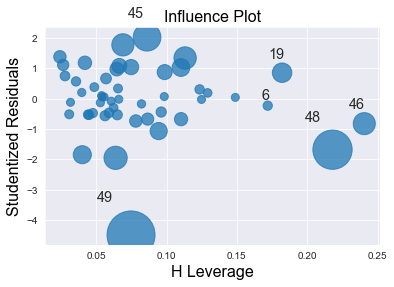

In [72]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [73]:
k = startup.shape[1]
n = startup.shape[0]
leverage_cutoff = 3*((k + 1)/n)
print(leverage_cutoff)

0.36


#Here we say that from both the graphs we cannot have any outliers in the data.

In [74]:
model_final= smf.ols('Profit ~ RDSpend+Administration+MarketingSpend',data=startup).fit()

In [75]:
(model_final.rsquared,model_final.aic)

(0.9507459940683246, 1058.7714985998055)

In [76]:
# Storing vif values in a data frame
d1 = {'Variables':['Profit','RDSpend','Administration','MarketingSpend'],'VIF':[vif_profit,vif_RDSpend,vif_Administration,vif_MarketingSpend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Profit,20.302917
1,RDSpend,19.563001
2,Administration,1.182146
3,MarketingSpend,2.465332


# Predicting for new data

In [77]:
#New data for prediction
#New data for prediction
new_data=pd.DataFrame({'Administration':123467.90,"RDSpend":160000,"MarketingSpend":461870},index=[1])

In [78]:
model_final.predict(new_data)

1    188301.515962
dtype: float64

# Predicting Price from Toyota Corolla data

Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

In [2]:

#Read the data
data=pd.read_csv("C:/Users/acer/Documents/Excel r/Assignments/Multiple regression/ToyotaCorolla.csv",encoding='unicode_escape')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [4]:
corolla=data[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [5]:
corolla.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [6]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [7]:
#check for missing values
corolla.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

# Correlation Matrix

In [8]:
corolla.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


# Scatter plot between variables along with histogram 

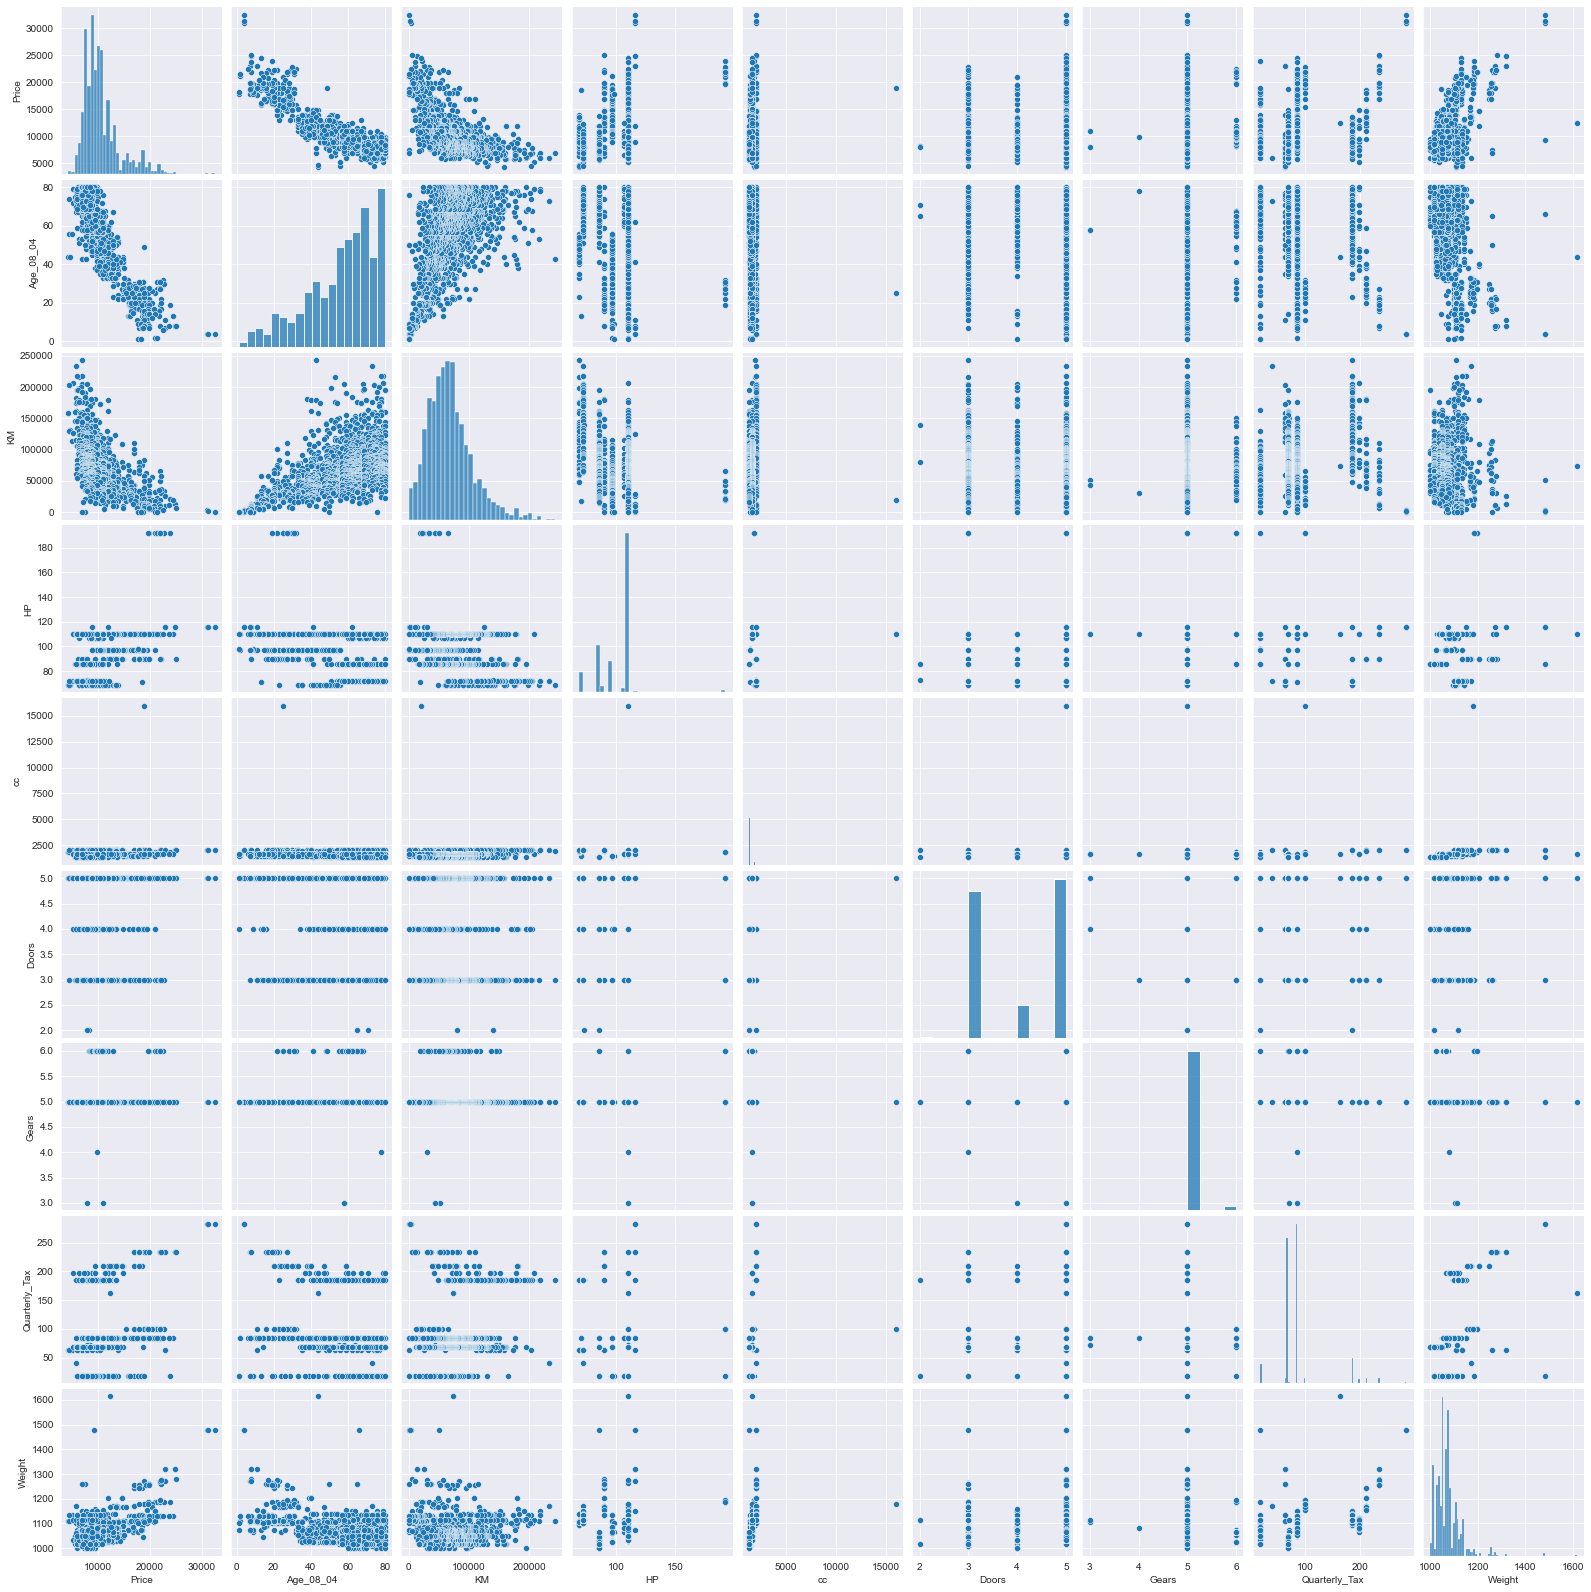

In [9]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(corolla)

# Preparing Model

In [10]:
#Build model
import statsmodels.formula.api as smf 
model_corolla= smf.ols('Price ~ Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=corolla).fit()


In [11]:
#Coefficients
model_corolla.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [12]:
#t and p-Values
print("T Values:",'\n',model_corolla.tvalues, '\n',"Pvalues:",'\n', model_corolla.pvalues)

T Values: 
 Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Pvalues: 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [13]:
#R squared and adjusted RSquared
(model_corolla.rsquared,model_corolla.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

# Simple Linear Regression Models

In [14]:
model_Age=smf.ols('Price ~ Age_08_04',data=corolla).fit()

In [15]:
#t and p value
print("T Values:",'\n',model_Age.tvalues, '\n',"Pvalues:",'\n', model_Age.pvalues)


T Values: 
 Intercept    138.907847
Age_08_04    -68.978267
dtype: float64 
 Pvalues: 
 Intercept    0.0
Age_08_04    0.0
dtype: float64


In [16]:
#R squared and adjusted RSquared
(model_Age.rsquared,model_Age.rsquared_adj)

(0.7684108996825327, 0.7682494010072765)

In [17]:
model_KM=smf.ols('Price~ KM',data=corolla).fit()

In [18]:
#t and p value
print("T Values:",'\n',model_KM.tvalues, '\n',"Pvalues:",'\n', model_KM.pvalues)


T Values: 
 Intercept    88.510378
KM          -26.267601
dtype: float64 
 Pvalues: 
 Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64


In [19]:
#R squared and adjusted RSquared
(model_KM.rsquared,model_KM.rsquared_adj)

(0.3248545891553044, 0.3243837764559706)

In [20]:
model_HP=smf.ols('Price~ HP',data=corolla).fit()

In [21]:
#t and p value
print("T Values:",'\n',model_HP.tvalues, '\n',"Pvalues:",'\n', model_HP.pvalues)

T Values: 
 Intercept     4.803134
HP           12.567862
dtype: float64 
 Pvalues: 
 Intercept    1.725695e-06
HP           1.926234e-34
dtype: float64


In [22]:
#R squared and adjusted RSquared
(model_HP.rsquared,model_HP.rsquared_adj)

(0.09921859277665879, 0.09859043279951563)

In [23]:
model_cc=smf.ols('Price ~ cc', data=corolla).fit()

In [24]:
#t and p value
print("T Values:",'\n',model_cc.tvalues, '\n',"Pvalues:",'\n', model_cc.pvalues)

T Values: 
 Intercept    24.694090
cc            4.824822
dtype: float64 
 Pvalues: 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [25]:
#R squared and adjusted RSquared
(model_cc.rsquared,model_cc.rsquared_adj)

(0.01597422921332259, 0.015288018773443546)

In [26]:
model_Doors=smf.ols('Price~Doors', data=corolla).fit()

In [27]:
#t and p value
print("T Values:",'\n',model_Doors.tvalues, '\n',"Pvalues:",'\n', model_Doors.pvalues)

T Values: 
 Intercept    19.258097
Doors         7.141657
dtype: float64 
 Pvalues: 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [28]:
#R squared and adjusted RSquared
(model_Doors.rsquared,model_cc.rsquared_adj)

(0.03434555943109785, 0.015288018773443546)

In [29]:
model_Gears=smf.ols('Price ~ Gears',data=corolla).fit()

In [30]:
#t and p value
print("T Values:",'\n',model_Gears.tvalues, '\n',"Pvalues:",'\n', model_Gears.pvalues)

T Values: 
 Intercept    1.814534
Gears        2.394401
dtype: float64 
 Pvalues: 
 Intercept    0.069804
Gears        0.016775
dtype: float64


In [31]:
#R squared and adjusted RSquared
(model_Gears.rsquared,model_Gears.rsquared_adj)

(0.003982096785360545, 0.003287523631096634)

In [41]:
model_quarterlyTax=smf.ols('Price ~ Quarterly_Tax',data=corolla).fit()

In [42]:
#t and p value
print("T Values:",'\n',model_quarterlyTax.tvalues, '\n',"Pvalues:",'\n', model_quarterlyTax.pvalues)

T Values: 
 Intercept        41.330311
Quarterly_Tax     8.507487
dtype: float64 
 Pvalues: 
 Intercept        1.532168e-246
Quarterly_Tax     4.407393e-17
dtype: float64


In [43]:
#R squared and adjusted RSquared
(model_quarterlyTax.rsquared,model_quarterlyTax.rsquared_adj)

(0.04804728567406569, 0.04738344138234618)

In [44]:
model_Weight=smf.ols('Price ~ Weight',data=corolla).fit()

In [45]:
#t and p value
print("T Values:",'\n',model_Weight.tvalues, '\n',"Pvalues:",'\n', model_Weight.pvalues)

T Values: 
 Intercept   -20.263590
Weight       27.045855
dtype: float64 
 Pvalues: 
 Intercept     1.739508e-80
Weight       1.630487e-130
dtype: float64


In [46]:
#R squared and adjusted RSquared
(model_Weight.rsquared,model_Weight.rsquared_adj)

(0.33779063704356427, 0.33732884529812746)

In [48]:
#Table of models and r square
d1 = {'Model':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'R Squared':[model_Age.rsquared,model_KM.rsquared,model_HP.rsquared,model_cc.rsquared,model_Doors.rsquared,model_Gears.rsquared,model_quarterlyTax.rsquared,model_Weight.rsquared]}
RSquared_frame = pd.DataFrame(d1)  
RSquared_frame

,Model,R Squared
0,Age_08_04,0.768411
1,KM,0.324855
2,HP,0.099219
3,cc,0.015974
4,Doors,0.034346
5,Gears,0.003982
6,Quarterly_Tax,0.048047
7,Weight,0.337791


In [49]:
rsq_Price = smf.ols('Price ~ Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=corolla).fit().rsquared  
vif_Price = 1/(1-rsq_Price) 

rsq_Age = smf.ols('Age_08_04~ Price+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=corolla).fit().rsquared  
vif_Age = 1/(1-rsq_Age) 

rsq_KM = smf.ols('KM ~ Age_08_04+Price+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=corolla).fit().rsquared  
vif_KM = 1/(1-rsq_KM) 

rsq_HP= smf.ols('HP~ KM+Age_08_04+Price+cc+Doors+Gears+Quarterly_Tax+Weight',data=corolla).fit().rsquared  
vif_HP= 1/(1-rsq_HP) 

rsq_cc = smf.ols('cc ~ KM+Age_08_04+Price+HP+Doors+Gears+Quarterly_Tax+Weight',data=corolla).fit().rsquared  
vif_cc = 1/(1-rsq_cc) 

rsq_Doors = smf.ols('Doors ~ KM+Age_08_04+Price+HP+cc+Gears+Quarterly_Tax+Weight',data=corolla).fit().rsquared  
vif_Doors= 1/(1-rsq_Doors) 

rsq_Gears= smf.ols('Gears~KM+Age_08_04+Price+HP+cc+Doors+Quarterly_Tax+Weight',data=corolla).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears) 

rsq_quartelyTax= smf.ols('Quarterly_Tax~ KM+Age_08_04+Price+HP+cc+Doors+Gears+Weight',data=corolla).fit().rsquared  
vif_quarterlyTax = 1/(1-rsq_quartelyTax) 

rsq_Weight= smf.ols('Weight~Gears+KM+Age_08_04+Price+HP+cc+Doors+Quarterly_Tax',data=corolla).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight) 

# Storing vif values in a data frame

In [50]:
d1 = {'Variables':['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_Price,vif_Age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_quarterlyTax,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Price,7.340136
1,Age_08_04,4.741730
2,KM,2.097055
3,HP,1.545112
4,cc,1.165368
5,Doors,1.156577
6,Gears,1.105727
7,Quarterly_Tax,2.326150
8,Weight,2.961102


All Vif values are less than 10 so there is no multicolinearity present in the model

# Residual Analysis(Q-Q Plot(Test for normality of residual))

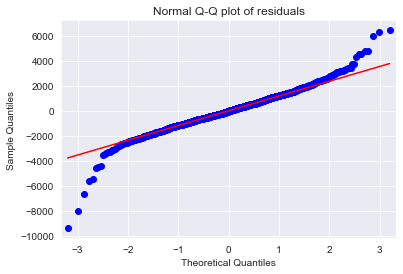

In [51]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_corolla.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [52]:
list(np.where(model_corolla.resid>2000))

[array([  14,   16,   19,   49,   52,   53,   62,   63,   64,   66,   68,
          72,   74,   76,   77,   80,   89,   91,  106,  109,  110,  111,
         112,  113,  115,  119,  123,  125,  139,  141,  146,  147,  149,
         151,  154,  161,  167,  171,  174,  178,  179,  223,  354,  468,
         523,  557,  656,  673,  693,  696,  796,  840,  913, 1054, 1058,
        1059, 1062, 1079, 1081, 1090, 1103, 1131, 1133, 1142, 1150, 1175,
        1184, 1189, 1196, 1211, 1214, 1240, 1250, 1280, 1327, 1378, 1383,
        1402, 1432], dtype=int64)]

# Residual plot for homoscedasticity

In [53]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

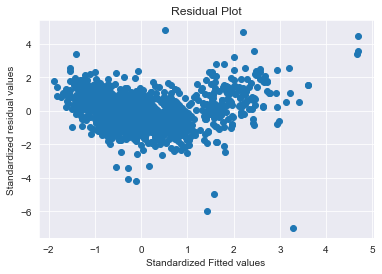

In [54]:

plt.scatter(get_standardized_values(model_corolla.fittedvalues),
            get_standardized_values(model_corolla.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

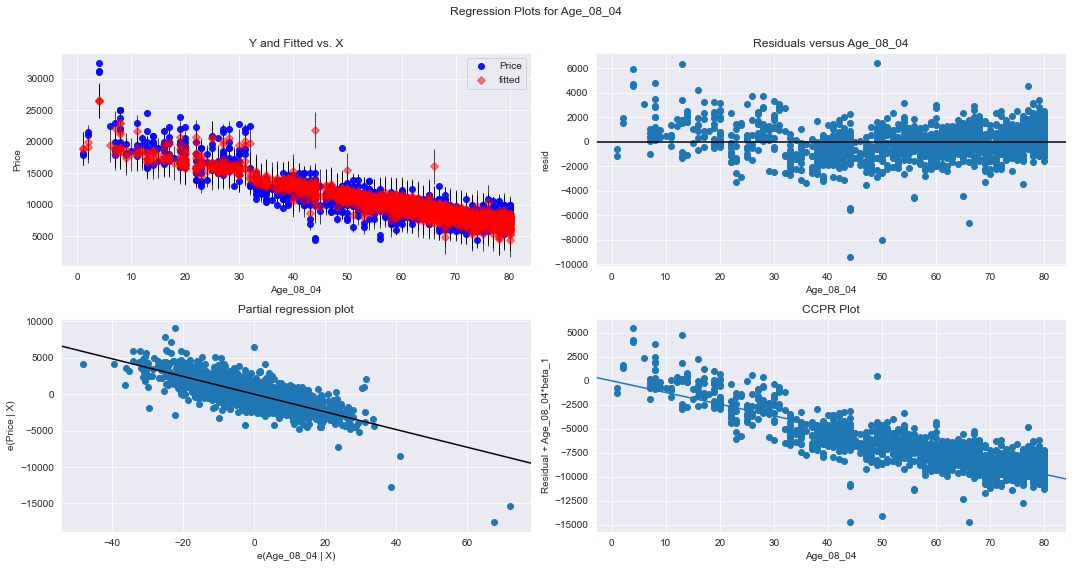

In [55]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_corolla, "Age_08_04", fig=fig)
plt.show()

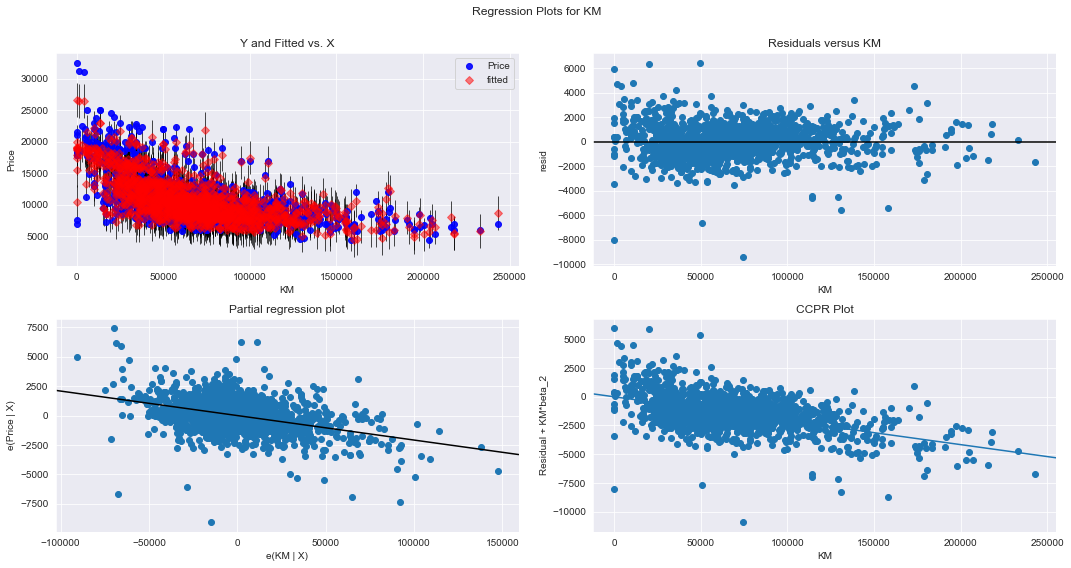

In [56]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_corolla, "KM", fig=fig)
plt.show()

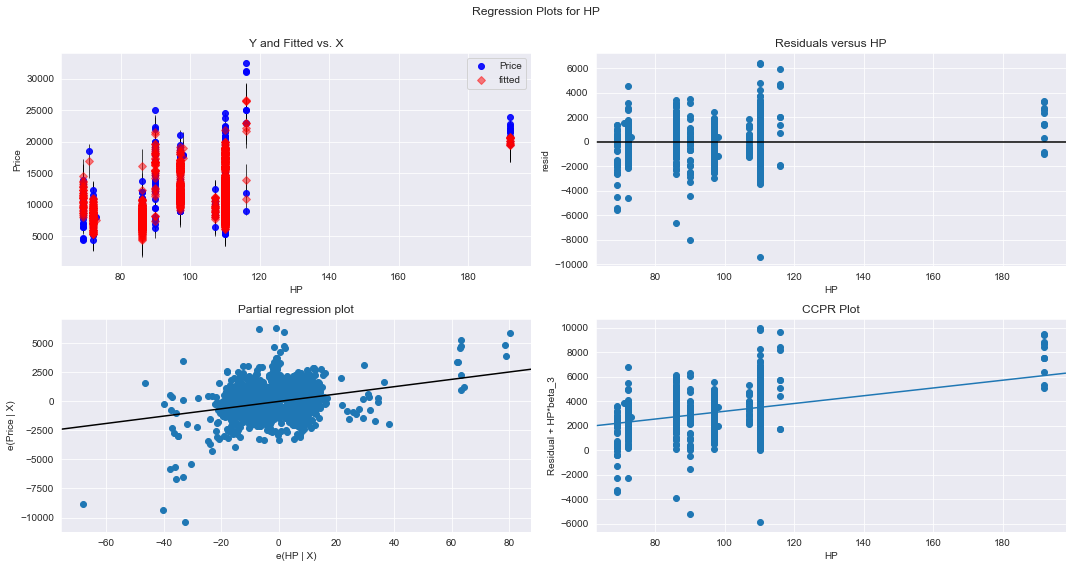

In [59]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_corolla, "HP", fig=fig)
plt.show()

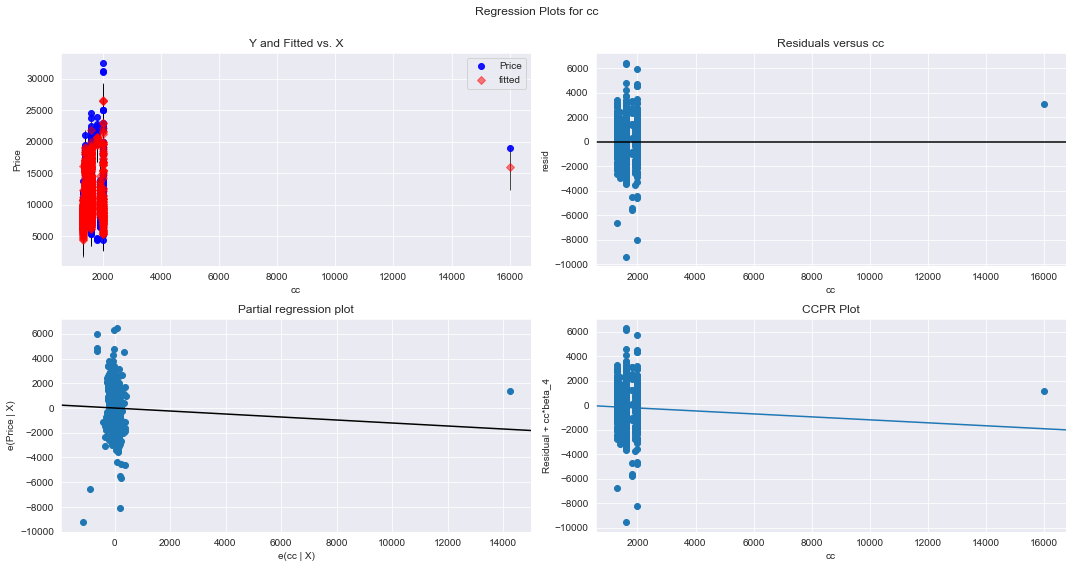

In [60]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_corolla, "cc", fig=fig)
plt.show()

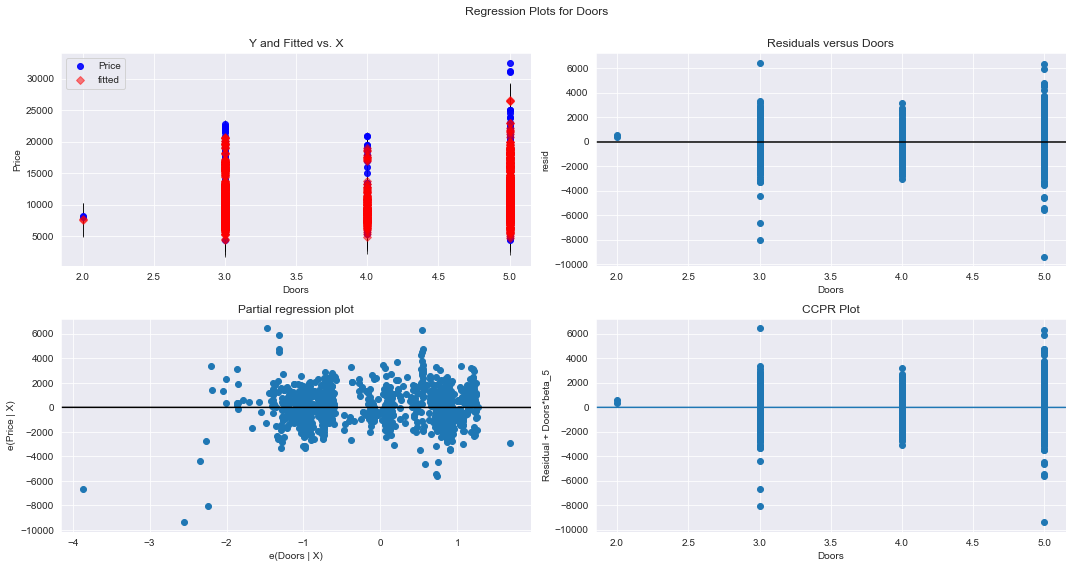

In [61]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_corolla, "Doors", fig=fig)
plt.show()

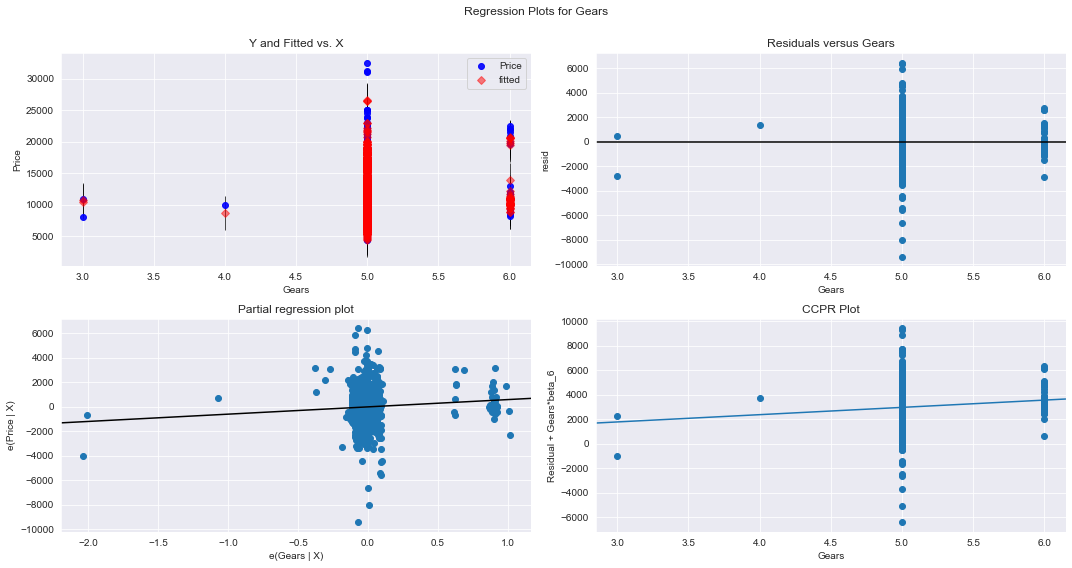

In [62]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_corolla, "Gears", fig=fig)
plt.show()

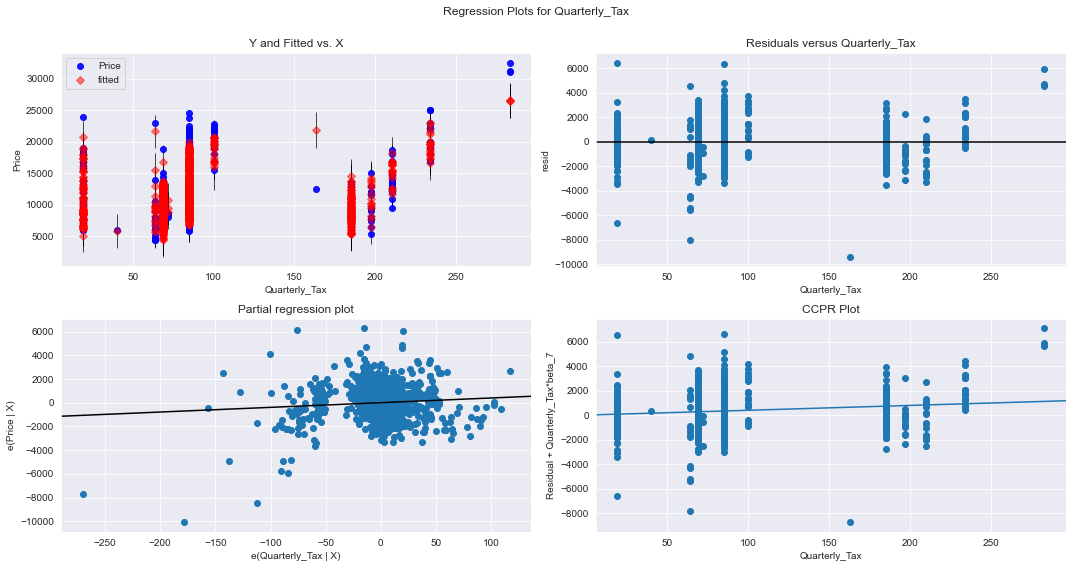

In [63]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_corolla, "Quarterly_Tax", fig=fig)
plt.show()

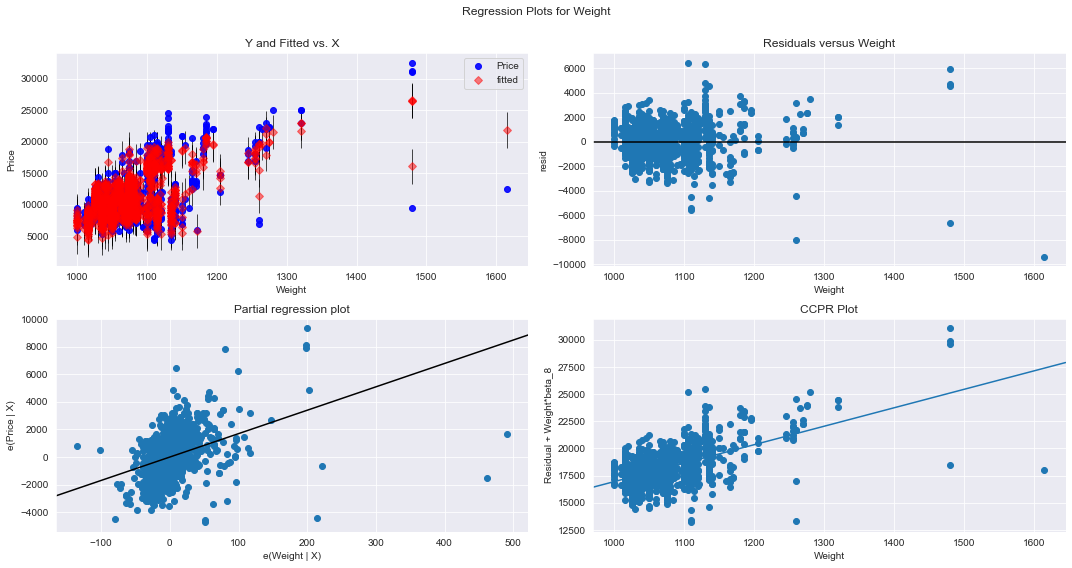

In [64]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_corolla, "Weight", fig=fig)
plt.show()

# Model Deletion Dignostic

# Influencers/Outliers

# Cooks Distance

In [69]:
model_influence = model_corolla.get_influence()
(c, _) = model_influence.cooks_distance


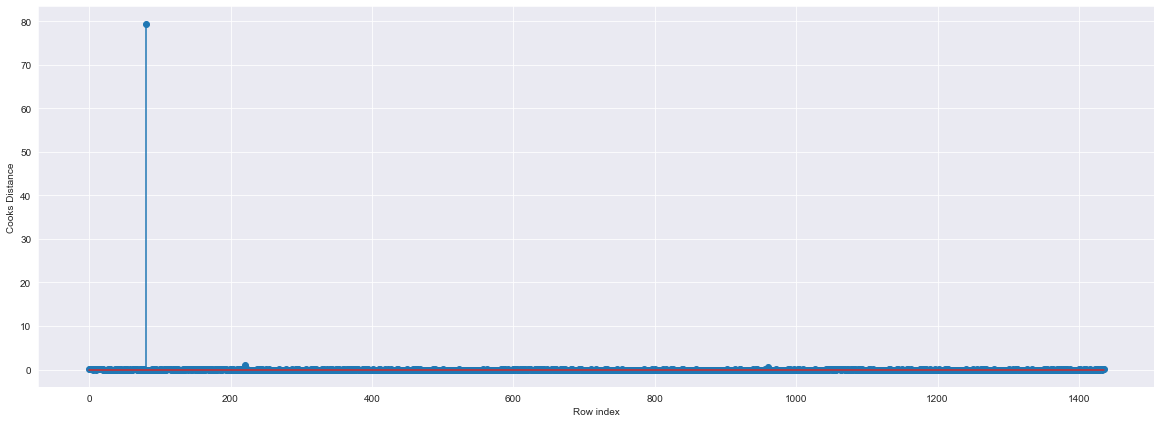

In [71]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(corolla)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [72]:
#index and value of influencer where c is more 
(np.argmax(c),np.max(c))

(80, 79.52010624138055)

In [77]:
#Drop 80th observation
corolla1=corolla.drop(corolla.index[[80]],axis=0)

In [79]:
corolla1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [78]:
#Reset the index and re arrange the row values
corolla2=corolla1.reset_index()

In [80]:
corolla3=corolla2.drop(['index'],axis=1)
corolla3.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [81]:
#Build model on the new data
import statsmodels.formula.api as smf 
model_corolla3= smf.ols('Price ~ Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=corolla3).fit()


In [86]:
#Again check for influencers
model_influence_V1 = model_corolla3.get_influence()
(c_V1, _) = model_influence_V1.cooks_distance

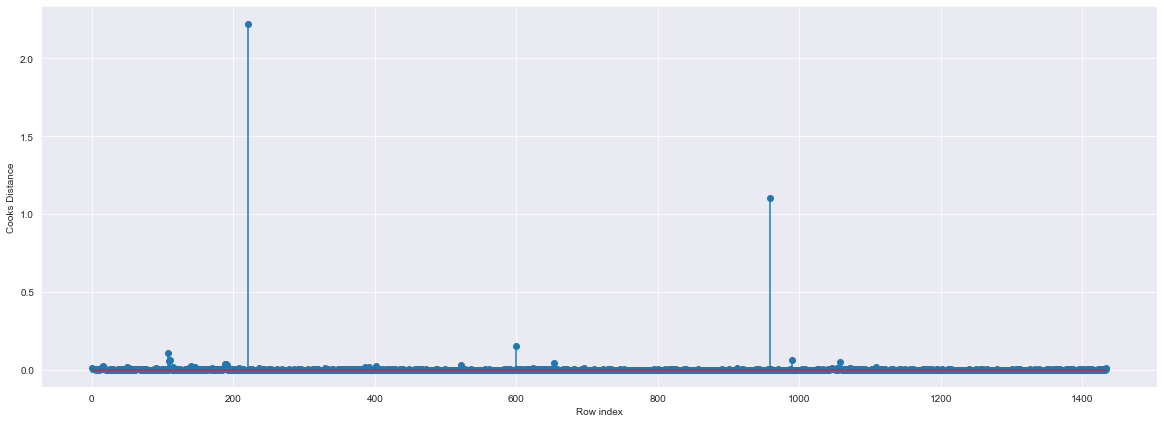

In [87]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(corolla3)),np.round(c_V1,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [89]:
#index and value of influencer where c is more 
(np.argmax(c_V1),np.max(c_V1))

(220, 2.2244611713001508)

In [108]:
#Drop 220 and 958 observations
corolla4=corolla3.drop(corolla3.index[[220,958]],axis=0)

In [109]:
#Reset the index and re arrange the row values
corolla5=corolla4.reset_index()

In [110]:
corolla_final=corolla5.drop(['index'],axis=1)
corolla_final.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [111]:
#Build model on the new data
import statsmodels.formula.api as smf 
model_final= smf.ols('Price ~ Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=corolla5).fit()


In [112]:
#Again check for influencers
model_influence_V3 = model_final.get_influence()
(c_V3, _) = model_influence_V3.cooks_distance

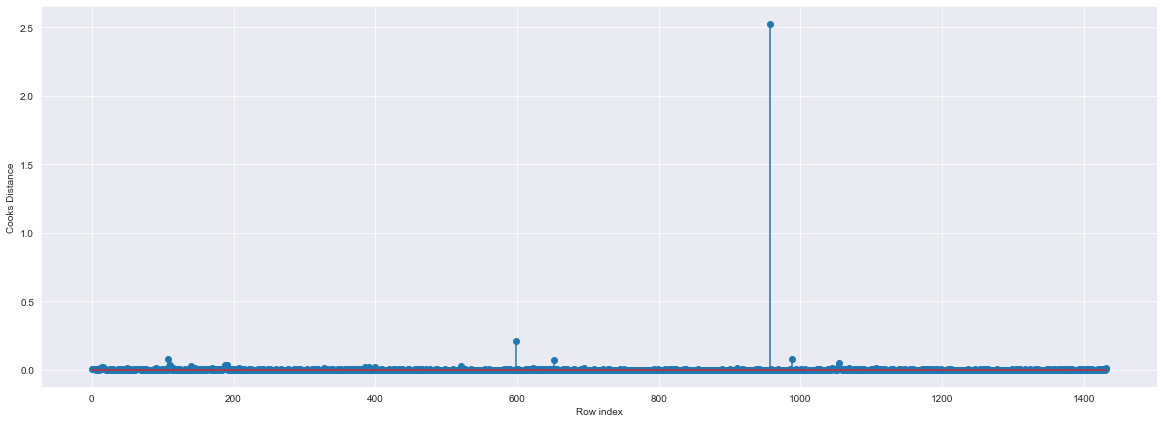

In [113]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(corolla5)),np.round(c_V3,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [114]:
#index and value of influencer where c is more 
(np.argmax(c_V3),np.max(c_V3))

(957, 2.528495879713804)

In [115]:
#Drop 957 observations
corolla6=corolla5.drop(corolla5.index[[957]],axis=0)

In [118]:
#Drop the original index
corolla_final1=corolla6.drop(['index'],axis=1)
corolla_final1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [121]:
#Build model on the new data
import statsmodels.formula.api as smf 
model_final1= smf.ols('Price ~ Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=corolla_final1).fit()


In [122]:
#Again check for influencers
model_influence_V4 = model_final1.get_influence()
(c_V4, _) = model_influence_V4.cooks_distance

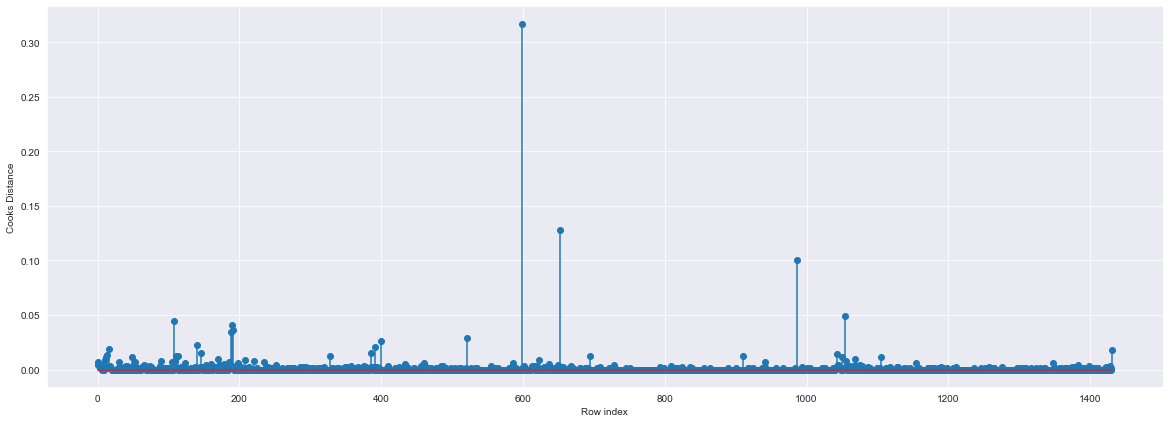

In [124]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(corolla_final1)),np.round(c_V4,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

Since the value is <1 , we can stop the diagnostic process and finalize the model

# High Influence Point

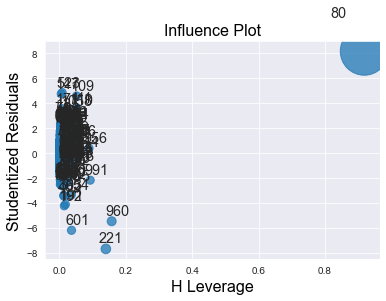

In [73]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_corolla)
plt.show()

In [75]:
k = corolla.shape[1]
n = corolla.shape[0]
leverage_cutoff = 3*((k + 1)/n)
print(leverage_cutoff)

0.020891364902506964


In [126]:
(model_final1.rsquared,model_final1.aic)

(0.8852934456594059, 24452.038072254247)